In [6]:
!pip install mysql-connector-python

In [7]:
# import mysql connector to connect with python
import mysql.connector

In [8]:
# Connect to server
import pandas as pd
con = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="Harsh2025",
    database="students")

data=pd.read_sql_query("select * from studmarks",con)    
data

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


In [9]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [10]:
# Convert Column into interger value
le = preprocessing.LabelEncoder()
data['Name'] = le.fit_transform(data.Name.values)
data['Name'] = data['Name'].astype('int64')

In [11]:
le = preprocessing.LabelEncoder()
data['Gender'] = le.fit_transform(data.Gender.values)
data['Gender'] = data['Gender'].astype('int64')

In [12]:
data.head(10)

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,4,1,1988-05-04,55,45,56,87,21,52,89,65
1,8,1,1987-04-05,75,96,78,64,90,61,58,2
2,6,1,1989-05-25,25,54,89,76,95,87,56,74
3,3,0,1990-12-08,78,96,86,63,54,89,75,45
4,2,0,1989-02-09,58,96,78,46,96,77,83,53
5,0,0,1988-05-04,45,87,52,89,55,89,87,52
6,9,0,1987-04-05,55,64,61,58,75,58,64,61
7,7,1,1989-05-25,54,76,87,56,25,56,76,87
8,1,0,1990-12-08,55,63,89,75,78,75,63,89
9,5,1,1989-02-09,96,46,77,83,58,83,46,77


# EDA Process - 

In [13]:
#Checking for data types of all columns
data.dtypes

Name          int64
Gender        int64
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [14]:
data.shape

(10, 11)

In [15]:
# Checking Statistical summery for dataset
data.describe()

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,4.50000,0.500000,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,3.02765,0.527046,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,0.00000,0.000000,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,2.25000,0.000000,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,4.50000,0.500000,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,6.75000,1.000000,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,9.00000,1.000000,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


# Preparing inputs (X) & target (y) values

In [16]:
import pandas as pd

data=pd.read_sql_query("select * from studmarks",con) 
le = preprocessing.LabelEncoder()
data['Gender'] = le.fit_transform(data.Gender.values)
data['Gender'] = data['Gender'].astype('int64')

feature_cols = ['Maths','Physics','Chemistry','English','Biology','Economics','History','Civics']
X = data[feature_cols]
#X = data[[Maths','Physics','Chemistry','English','Biology','Economics','History','Civics']]

#y = data.Name  # y is a vector, hence we use dot to access 'label'

In [17]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(10, 8)


In [18]:
# select a Series from the DataFrame
y = data['Gender']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.Gender

# print the first 5 values
y.head(10)

0    1
1    1
2    1
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: Gender, dtype: int64

In [19]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(10,)


# Apply Logistic Regression Model-

In [20]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.0


In [23]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score

cross_val_score(logreg, X, y, cv=5, scoring='roc_auc').mean()

0.4

In [24]:
# Load libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [25]:
# Spot Check Algorithms for multiple models

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))

# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.583333 (0.083333)
LDA: 0.750000 (0.250000)


In [28]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
LinearDiscriminantAnalysis()
print(clf.predict(X_test))

[1 1 0]


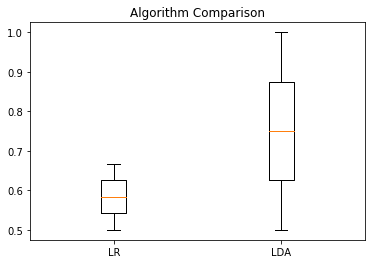

In [29]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [31]:
# scoring parameters for classification
# scoring =[accuracy,f1,f1_micro,f1_macro,roc_auc]

sv=SVC()
score=cross_val_score(sv,X,y,cv=5,scoring='accuracy')
print('accuracy score=',score)
print ('mean scores',score.mean)
print('std',score.std())
y_pred = cross_val_predict(sv,X,y,cv=5)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score= [1.  0.5 0.5 1.  0.5]
mean scores <built-in method mean of numpy.ndarray object at 0x000002763F87EDA0>
std 0.2449489742783178
Y prediction values
[1 0 0 0 0 0 0 1 1 1]


0.7

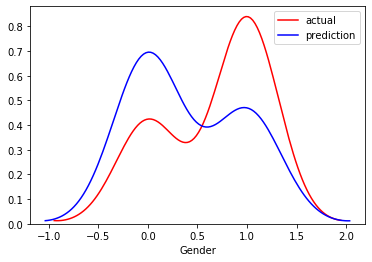

In [32]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

# Saving Specific Machine Learning Algorithm- 

In [33]:
#Save the Model using pickle or joblib library
from sklearn.externals import joblib

joblib_file = "joblib_clf.pkl"             # Save to file in the current working directory
joblib.dump(clf, joblib_file)
joblib_clf = joblib.load(joblib_file)      # Load from file
score = joblib_clf.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for Linear Discriminant Analysis Model: {0:.2f} %".format(100 * score))

Test score for Linear Discriminant Analysis Model: 100.00 %


Conclusion-This dataset is perfect & giving 100% score for logistic regression for student's marks.